In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")
from sklearn.model_selection import train_test_split
from datetime import datetime

No Warning Shown


In [2]:
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_excel('Low_high_30.xlsx')

In [4]:
df.shape

(1948, 18)

In [5]:
df.columns = df.columns.str.rstrip()

In [6]:
df.head(3)

Material_Batch Sample Description         Sample Time  Duration_days  \
0  804564 SB0014  Day 0 (Post-inoc) 2018-10-29 05:17:00       0.025694   
1  804564 SB0014         Day 0 12hr 2018-10-29 19:17:00       0.609028   
2  804564 SB0014              Day 1 2018-10-30 05:39:00       1.040972   

   Duration_hr    VCD  Viability  PCV final result  Offline pH    pO2  pCO2  \
0     0.616667  11.86       96.7             0.200        7.11   80.5  24.1   
1    14.616667  20.45       98.0             0.345        7.16  114.9  24.3   
2    24.983333  28.69       96.9             0.450        7.05  106.0  32.3   

    GLN  GLUC   LAC  Ammonia  Sodium  Osmolality  Titer  
0  5.74  7.36  0.47     2.41    72.5         320    0.0  
1  8.13  7.17  0.45     3.57    67.2         323    0.0  
2  5.60  6.90  0.67     4.44    70.9         324    0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Material_Batch      1948 non-null   object        
 1   Sample Description  1948 non-null   object        
 2   Sample Time         1948 non-null   datetime64[ns]
 3   Duration_days       1948 non-null   float64       
 4   Duration_hr         1948 non-null   float64       
 5   VCD                 1948 non-null   float64       
 6   Viability           1948 non-null   float64       
 7   PCV final result    1948 non-null   float64       
 8   Offline pH          1948 non-null   float64       
 9   pO2                 1948 non-null   float64       
 10  pCO2                1948 non-null   float64       
 11  GLN                 1948 non-null   float64       
 12  GLUC                1948 non-null   float64       
 13  LAC                 1948 non-null   float64     

In [8]:
df.columns

Index(['Material_Batch', 'Sample Description', 'Sample Time', 'Duration_days',
       'Duration_hr', 'VCD', 'Viability', 'PCV final result', 'Offline pH',
       'pO2', 'pCO2', 'GLN', 'GLUC', 'LAC', 'Ammonia', 'Sodium', 'Osmolality',
       'Titer'],
      dtype='object')

In [9]:
df1 =df[['Viability','VCD','PCV final result','Offline pH','pO2','pCO2','GLN','GLUC','LAC','Ammonia','Sodium','Osmolality','Titer','Duration_hr','Material_Batch']]

In [10]:
sum_missing = df1.isnull().sum()
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'sum_missing':sum_missing,'percent_missing': percent_missing})
missing_value_df

sum_missing  percent_missing
Viability                   0              0.0
VCD                         0              0.0
PCV final result            0              0.0
Offline pH                  0              0.0
pO2                         0              0.0
pCO2                        0              0.0
GLN                         0              0.0
GLUC                        0              0.0
LAC                         0              0.0
Ammonia                     0              0.0
Sodium                      0              0.0
Osmolality                  0              0.0
Titer                       0              0.0
Duration_hr                 0              0.0
Material_Batch              0              0.0

In [11]:
#df.columns = df.columns.str.rstrip()

In [12]:
df1.describe().transpose().round(3)

count     mean     std     min      25%      50%      75%  \
Viability         1948.0   94.870   2.902   79.20   93.000   95.100   97.400   
VCD               1948.0   62.405  19.299   10.81   54.270   70.115   75.772   
PCV final result  1948.0    2.213   1.139    0.18    1.075    2.450    3.200   
Offline pH        1948.0    6.932   0.072    6.79    6.880    6.920    6.960   
pO2               1948.0   66.992  30.307    0.00   42.575   69.150   90.825   
pCO2              1948.0   47.635  15.231    5.70   35.800   48.450   56.600   
GLN               1948.0    3.211   2.142    0.00    1.388    2.320    4.980   
GLUC              1948.0   10.402   4.054    0.00    7.060    9.180   13.945   
LAC               1948.0    0.928   0.446    0.00    0.580    0.940    1.260   
Ammonia           1948.0    7.118   2.714    0.20    4.877    6.940    9.542   
Sodium            1948.0   82.798   8.109   20.55   76.300   81.700   88.800   
Osmolality        1948.0  355.945  29.237  312.00  326.000  352.000  385.000   
Titer             1948.0    0.156   0.379    0.00    0.000    0.000    0.000   
Duration_hr       1948.0  144.537  85.132    0.55   71.458  145.625  218.029   

                      max  
Viability          99.300  
VCD               121.140  
PCV final result    4.100  
Offline pH          7.560  
pO2               189.100  
pCO2              121.300  
GLN                 9.940  
GLUC               21.560  
LAC                 2.580  
Ammonia            12.760  
Sodium            142.700  
Osmolality        416.000  
Titer               1.462  
Duration_hr       294.283

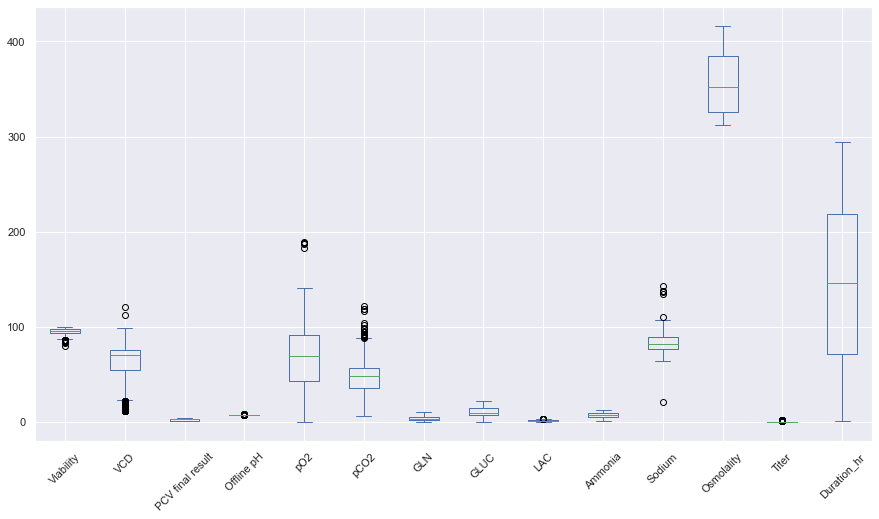

In [13]:
df1.plot.box(grid = 'True')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,8)

In [14]:
df1.columns

Index(['Viability', 'VCD', 'PCV final result', 'Offline pH', 'pO2', 'pCO2',
       'GLN', 'GLUC', 'LAC', 'Ammonia', 'Sodium', 'Osmolality', 'Titer',
       'Duration_hr', 'Material_Batch'],
      dtype='object')

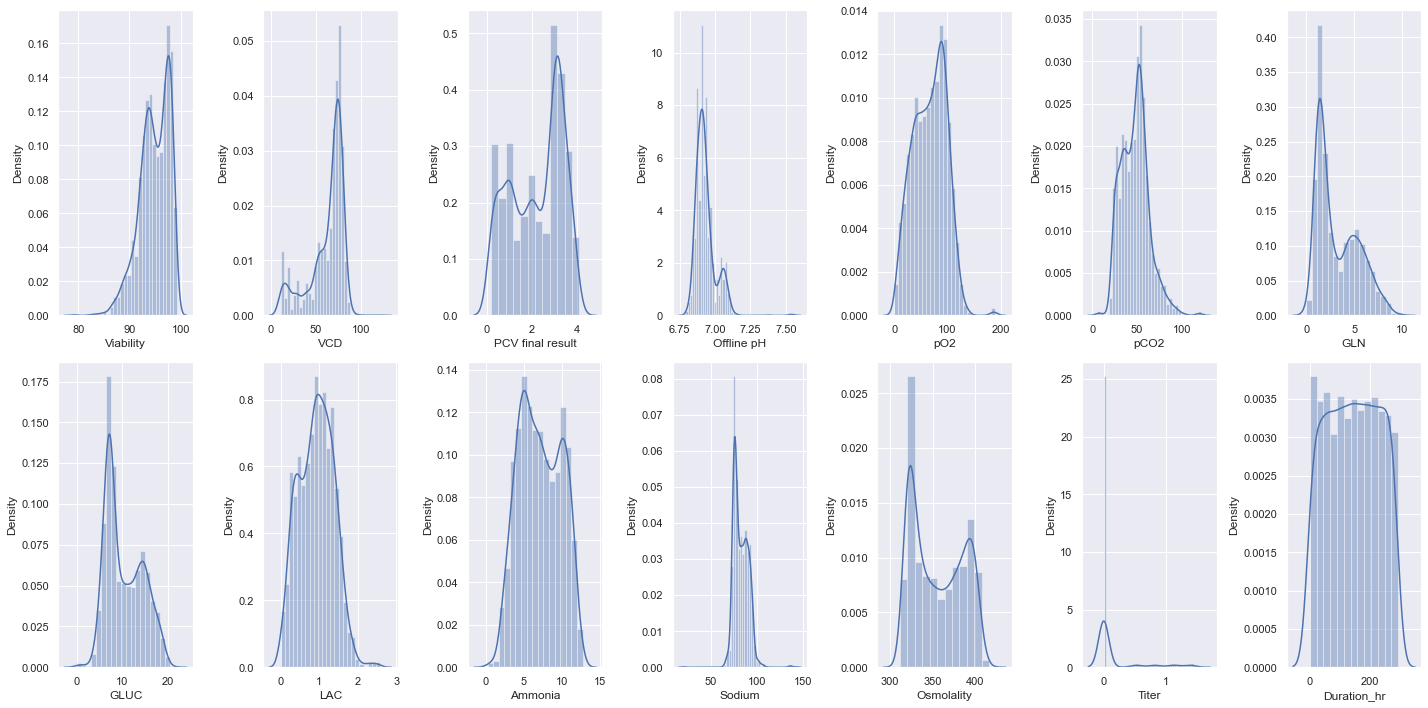

In [15]:
df2=df1.drop('Material_Batch',axis=1)
rows = 2
cols = 7
#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 10))
#Iterating through each row and column of the testing dataframe
col = df2.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df2[col[index]], ax = ax[i][j])
        index += 1
plt.tight_layout()

In [16]:
#sns.distplot(df2['Titer'],bins ="auto")

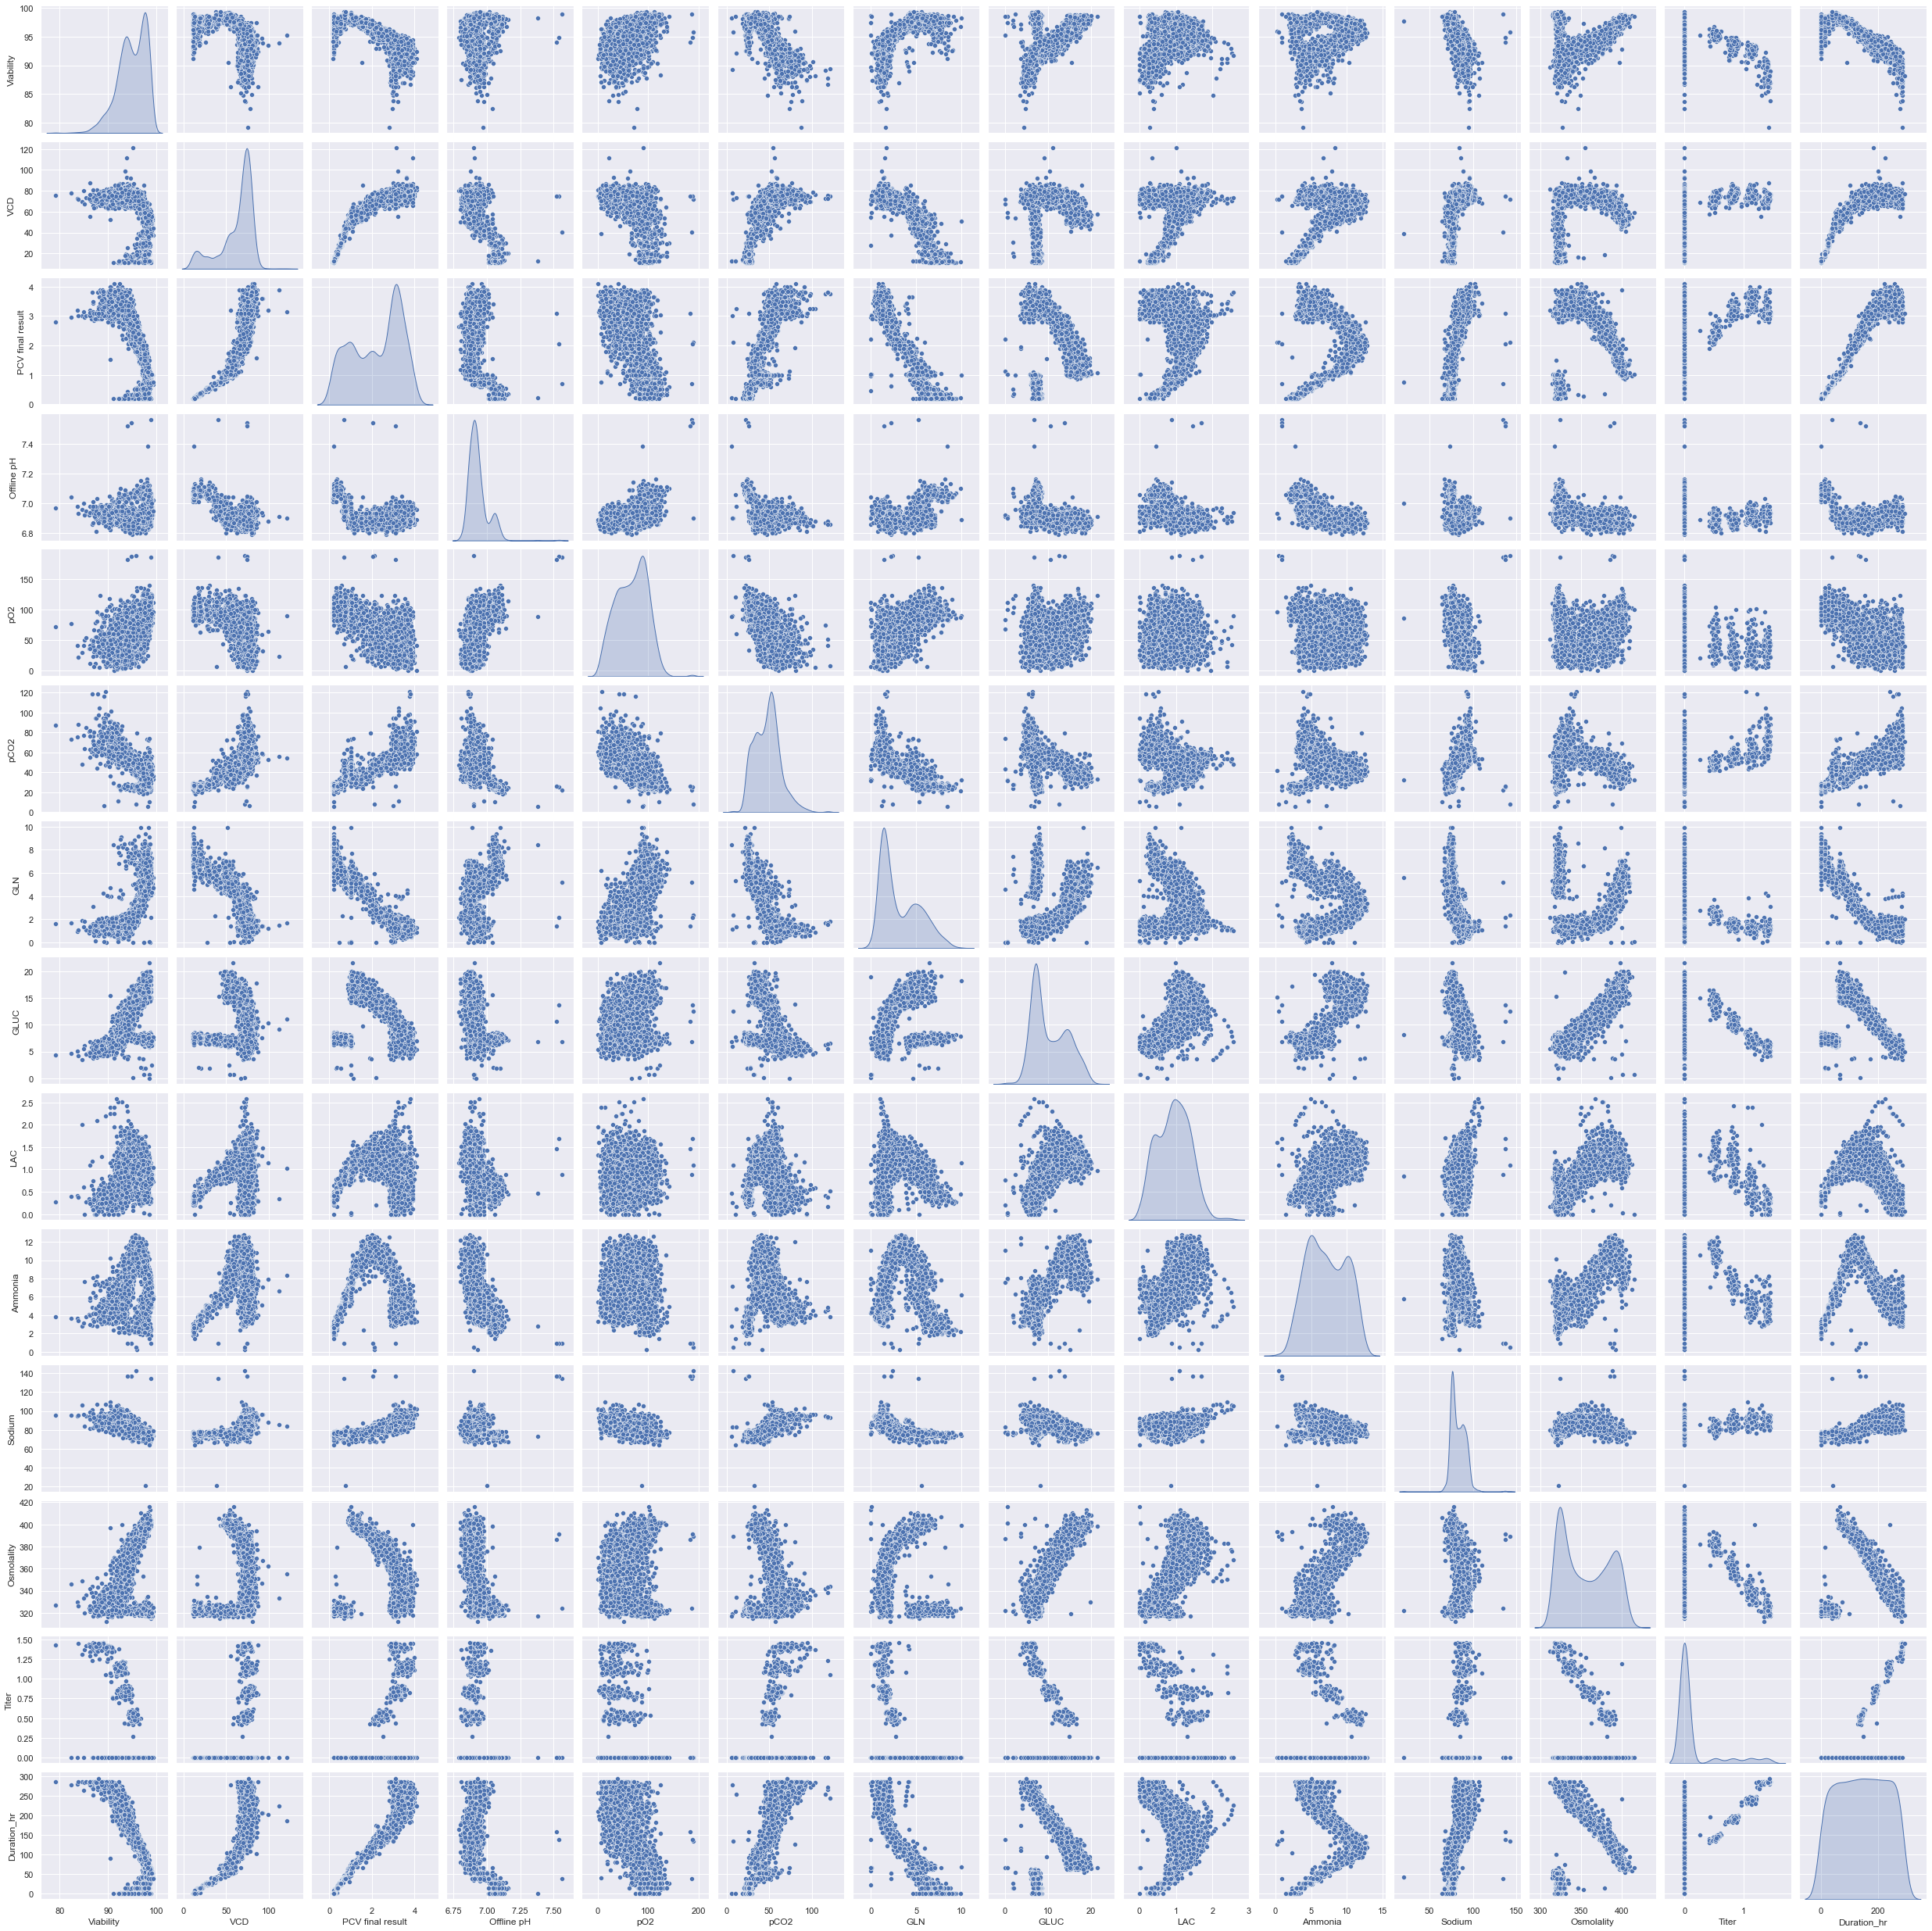

In [17]:
sns.pairplot(df2, diag_kind = 'kde')

In [18]:
df2.head(3)

Viability    VCD  PCV final result  Offline pH    pO2  pCO2   GLN  GLUC  \
0       96.7  11.86             0.200        7.11   80.5  24.1  5.74  7.36   
1       98.0  20.45             0.345        7.16  114.9  24.3  8.13  7.17   
2       96.9  28.69             0.450        7.05  106.0  32.3  5.60  6.90   

    LAC  Ammonia  Sodium  Osmolality  Titer  Duration_hr  
0  0.47     2.41    72.5         320    0.0     0.616667  
1  0.45     3.57    67.2         323    0.0    14.616667  
2  0.67     4.44    70.9         324    0.0    24.983333

Viability       VCD  PCV final result  Offline pH       pO2  \
Viability          1.000000 -0.524695         -0.759772    0.120826  0.523113   
VCD               -0.524695  1.000000          0.880935   -0.638781 -0.559387   
PCV final result  -0.759772  0.880935          1.000000   -0.452020 -0.632826   
Offline pH         0.120826 -0.638781         -0.452020    1.000000  0.505751   
pO2                0.523113 -0.559387         -0.632826    0.505751  1.000000   
pCO2              -0.750477  0.706641          0.805886   -0.435674 -0.616245   
GLN                0.703724 -0.875970         -0.933113    0.453588  0.605621   
GLUC               0.456722  0.127128         -0.177430   -0.453163  0.076816   
LAC                0.295016  0.300217          0.052913   -0.389678 -0.044892   
Ammonia            0.309732  0.390835          0.037454   -0.616250 -0.105465   
Sodium            -0.685699  0.615378          0.761497   -0.116858 -0.412558   
Osmolality         0.305570  0.311915          0.013507   -0.548969 -0.036601   
Titer             -0.464596  0.251263          0.345674   -0.130817 -0.384629   
Duration_hr       -0.864459  0.812969          0.948126   -0.377147 -0.608241   

                      pCO2       GLN      GLUC       LAC   Ammonia    Sodium  \
Viability        -0.750477  0.703724  0.456722  0.295016  0.309732 -0.685699   
VCD               0.706641 -0.875970  0.127128  0.300217  0.390835  0.615378   
PCV final result  0.805886 -0.933113 -0.177430  0.052913  0.037454  0.761497   
Offline pH       -0.435674  0.453588 -0.453163 -0.389678 -0.616250 -0.116858   
pO2              -0.616245  0.605621  0.076816 -0.044892 -0.105465 -0.412558   
pCO2              1.000000 -0.777444 -0.325550 -0.117869 -0.082371  0.657426   
GLN              -0.777444  1.000000  0.179885 -0.077244 -0.112726 -0.718057   
GLUC             -0.325550  0.179885  1.000000  0.595049  0.784697 -0.292220   
LAC              -0.117869 -0.077244  0.595049  1.000000  0.602290  0.171580   
Ammonia          -0.082371 -0.112726  0.784697  0.602290  1.000000 -0.211922   
Sodium            0.657426 -0.718057 -0.292220  0.171580 -0.211922  1.000000   
Osmolality       -0.150961 -0.016877  0.892244  0.688273  0.796264 -0.062547   
Titer             0.405642 -0.337178 -0.224737 -0.170871 -0.134314  0.294684   
Duration_hr       0.835989 -0.900994 -0.284648 -0.139286 -0.078096  0.728564   

                  Osmolality     Titer  Duration_hr  
Viability           0.305570 -0.464596    -0.864459  
VCD                 0.311915  0.251263     0.812969  
PCV final result    0.013507  0.345674     0.948126  
Offline pH         -0.548969 -0.130817    -0.377147  
pO2                -0.036601 -0.384629    -0.608241  
pCO2               -0.150961  0.405642     0.835989  
GLN                -0.016877 -0.337178    -0.900994  
GLUC                0.892244 -0.224737    -0.284648  
LAC                 0.688273 -0.170871    -0.139286  
Ammonia             0.796264 -0.134314    -0.078096  
Sodium             -0.062547  0.294684     0.728564  
Osmolality          1.000000 -0.161620    -0.108867  
Titer              -0.161620  1.000000     0.424028  
Duration_hr        -0.108867  0.424028     1.000000

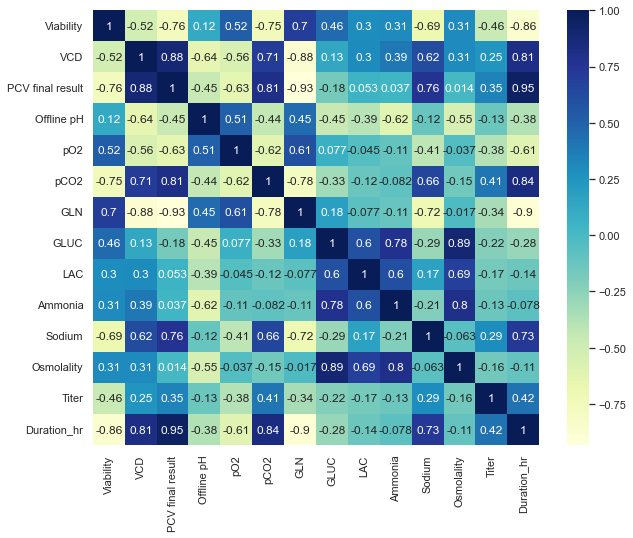

In [19]:
sns.set(color_codes=True)
plt.subplots(figsize=(10,8))
sns.heatmap(df2.corr(), cmap= 'YlGnBu', annot=True)
df2.corr()

In [20]:
#fig = px.imshow(df1.corr())
#fig.update_layout(title='Correlation Matrix among X variables')
#fig.show()

In [21]:
df2.columns

Index(['Viability', 'VCD', 'PCV final result', 'Offline pH', 'pO2', 'pCO2',
       'GLN', 'GLUC', 'LAC', 'Ammonia', 'Sodium', 'Osmolality', 'Titer',
       'Duration_hr'],
      dtype='object')

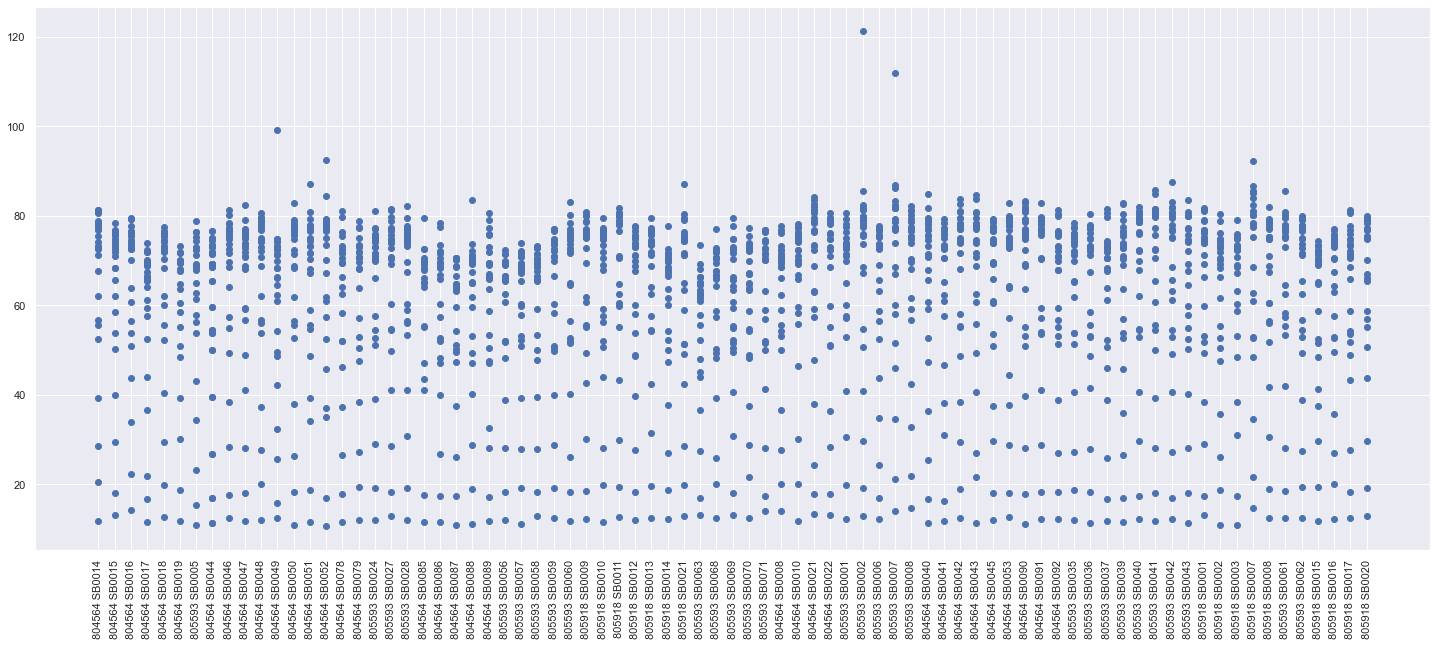

In [22]:
plt.scatter(df['Material_Batch'],df['VCD'])
plt.xticks(rotation=90)
plt.gcf().set_size_inches(25,10)
plt.show()


In [23]:
#import plotly.express as px
#fig = px.scatter(df1, x="Material_Batch", y="VCD", color='Material_Batch')
#fig.show()

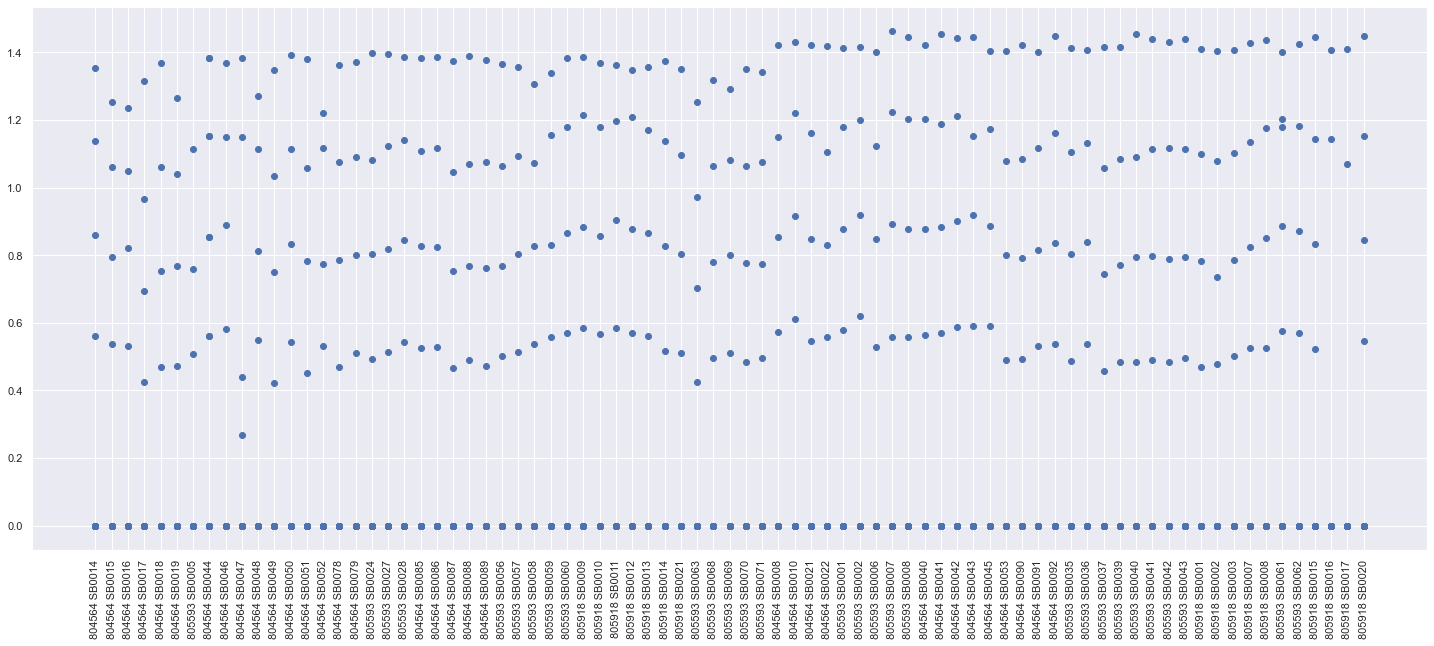

In [24]:
plt.scatter(df['Material_Batch'],df['Titer'])
plt.xticks(rotation=90)
plt.gcf().set_size_inches(25,10)
plt.show()

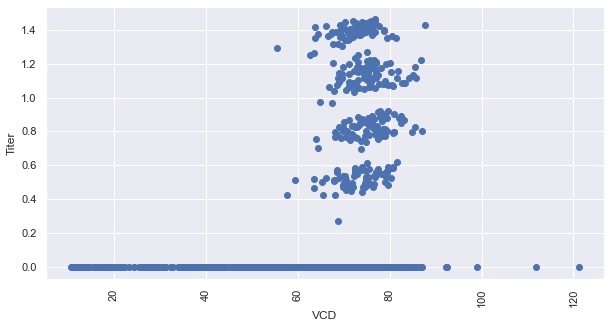

In [25]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['Titer'])
ax.set_ylabel('Titer')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

In [26]:
#import plotly.express as px
#fig = px.scatter(df1, x="Material_Batch", y="Titer", color='Material_Batch')
#fig.show()

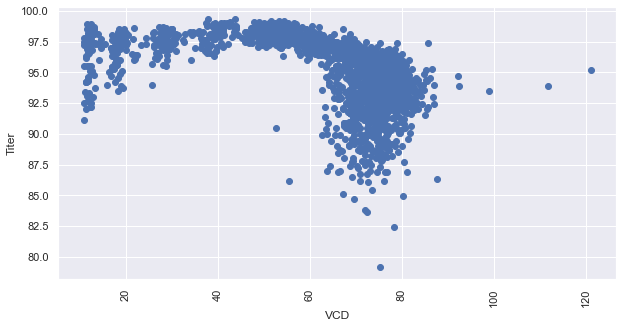

In [27]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['Viability'])
ax.set_ylabel('Titer')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

In [28]:
#import plotly.express as px
#fig = px.scatter(df1, x="VCD", y="Titer", title='VCD vs Titer(g/L)', color='Material_Batch')
#fig.show()

In [29]:
import plotly.express as px
fig = px.scatter(df1, x="VCD", y="Viability", title='VCD vs Viability(%)', color='Material_Batch')
fig.show()

In [30]:
import plotly.express as px
fig = px.scatter(df1, x="VCD", y="PCV final result", title='VCD vs PCV_final_ result(%)', color='VCD')
fig.show()

In [31]:
#import plotly.express as px
#fig = px.line(df1, x="VCD", y="PCV final result", title='VCD vs PCV_final_ result(%)', color='Material_Batch')
#fig.show()

In [32]:
import plotly.express as px
fig = px.scatter(df1, x="pCO2", y="VCD", title='VCD vs pCO2(mmHg)', color='Material_Batch')
fig.show()

In [33]:
import plotly.express as px
fig = px.scatter(df1, x="Sodium", y="VCD", title='VCD vs Sodium(mmol/L)', color='Material_Batch')
fig.show()

In [35]:
import plotly.express as px
fig = px.scatter(df, x="Duration_hr", y="VCD", title='VCD vs Duration(days)', color='Material_Batch')
fig.show()

In [36]:
import plotly.express as px
fig = px.scatter(df2, x="Duration_hr", y="VCD", title='VCD vs Duration(hrs)', color='Offline pH')
fig.show()

In [37]:
import plotly.express as px
fig = px.scatter(df1, x="Offline pH", y="VCD", title='VCD vs Duration(days)', color='Material_Batch')
fig.show()

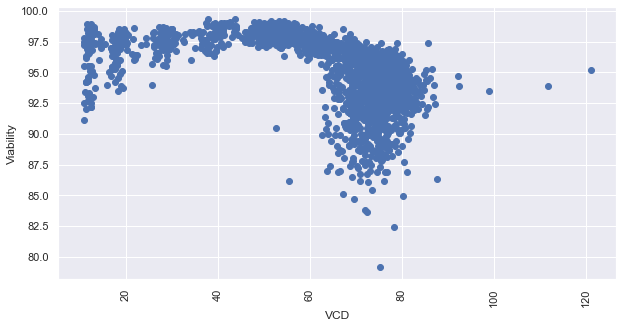

In [38]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['Viability'])
ax.set_ylabel('Viability')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

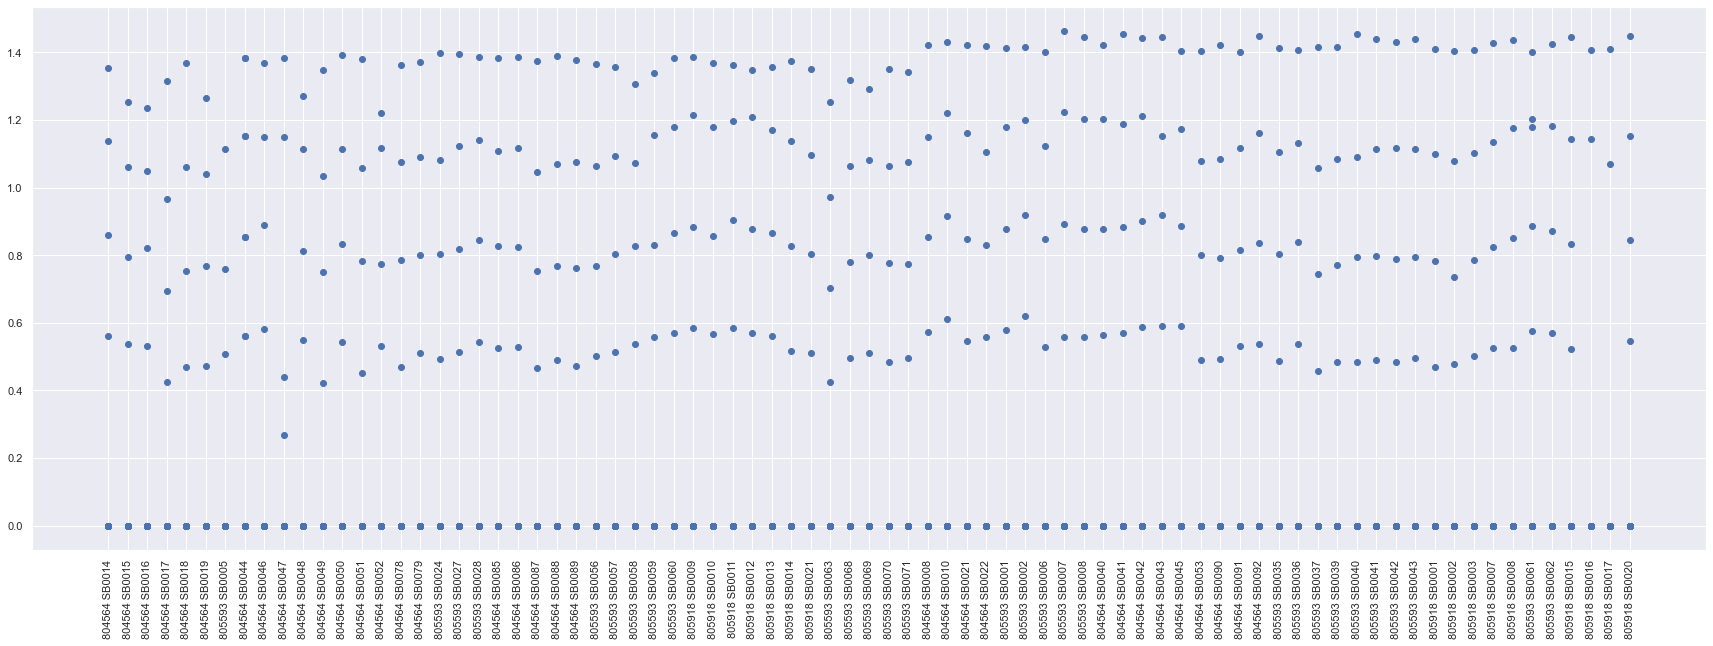

In [39]:
plt.scatter(df1['Material_Batch'],df1['Titer'])
plt.xticks(rotation=90)
plt.gcf().set_size_inches(30,10)
plt.show()

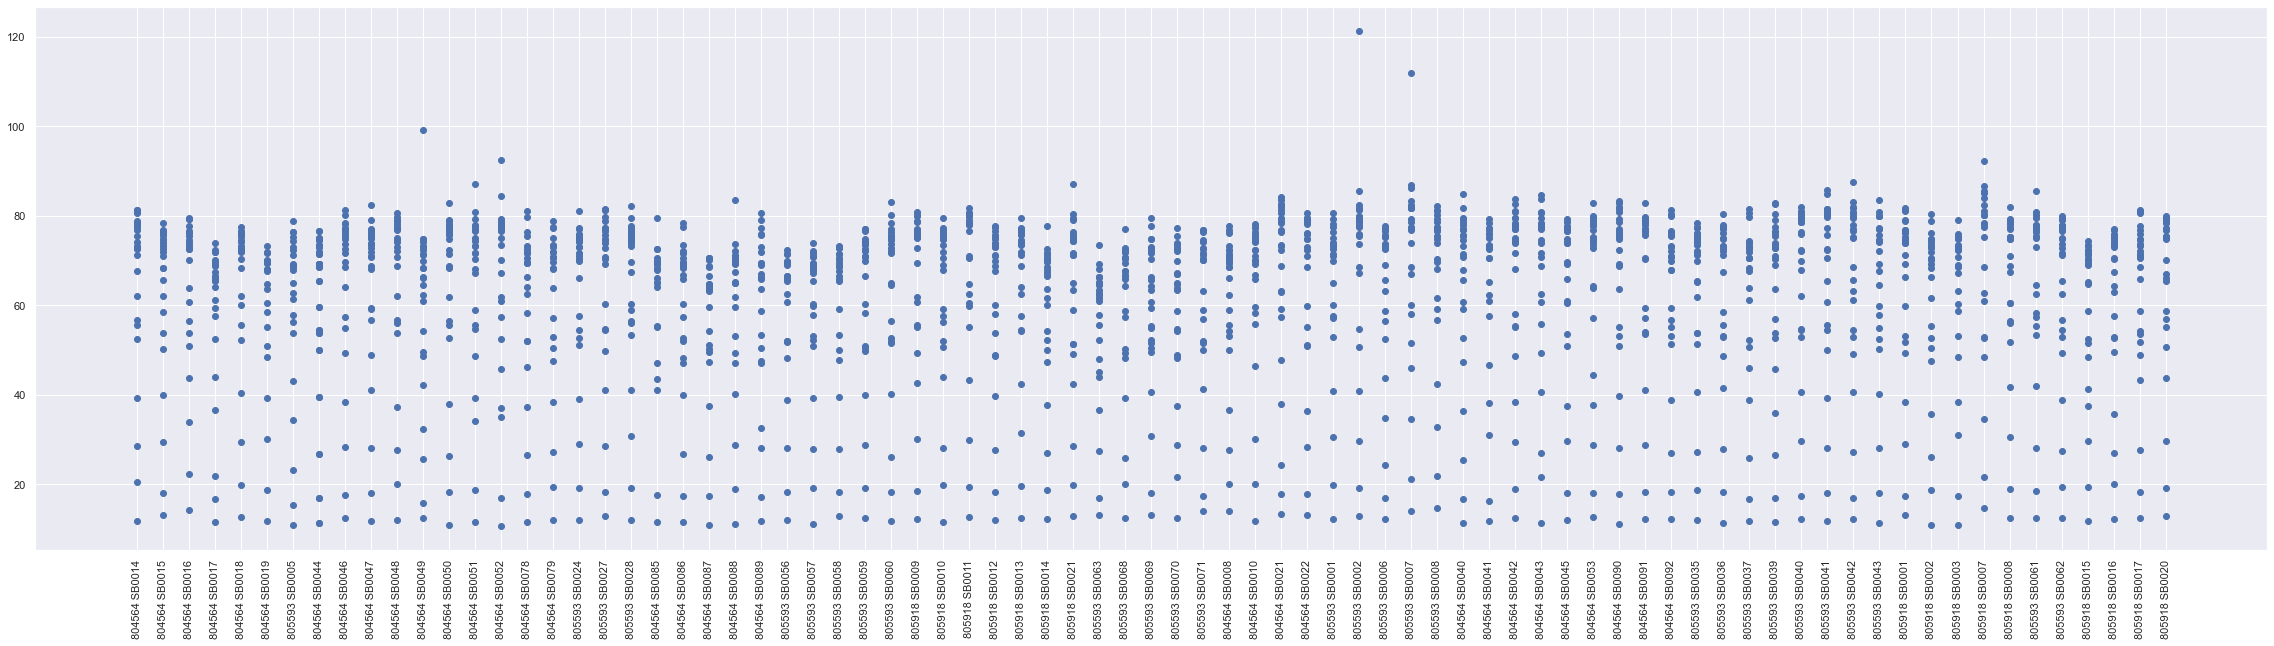

In [40]:
plt.scatter(df['Material_Batch'],df['VCD'])
plt.xticks(rotation=90)
plt.gcf().set_size_inches(40,10)
plt.show()

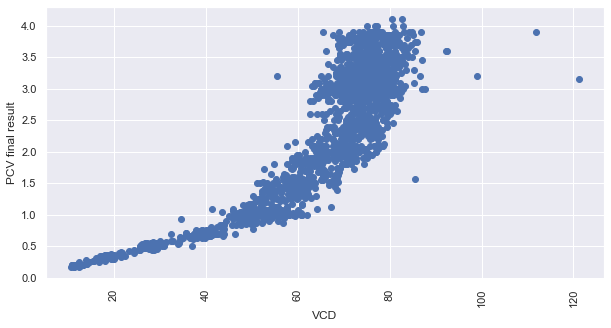

In [41]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['PCV final result'])
ax.set_ylabel('PCV final result')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

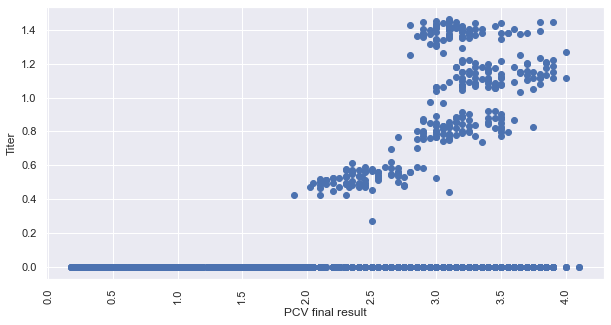

In [42]:
fig,ax = plt.subplots()
plt.scatter(df1['PCV final result'],df1['Titer'])
ax.set_ylabel('Titer')
ax.set_xlabel('PCV final result')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

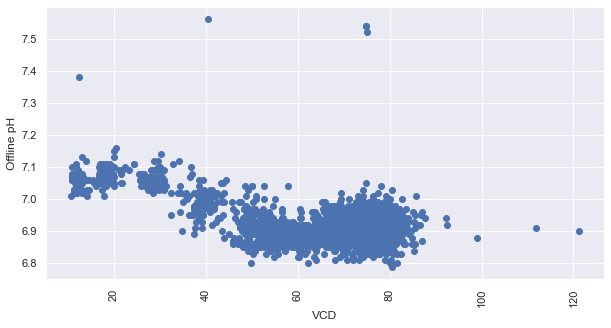

In [43]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

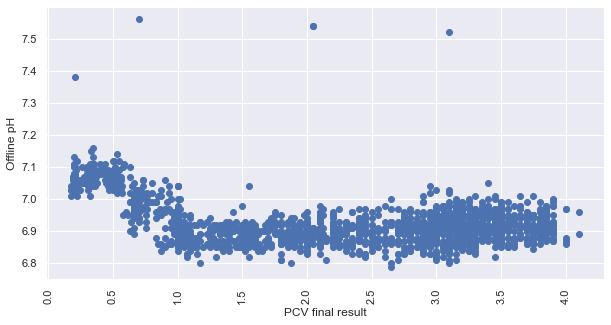

In [44]:
fig,ax = plt.subplots()
plt.scatter(df1['PCV final result'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('PCV final result')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

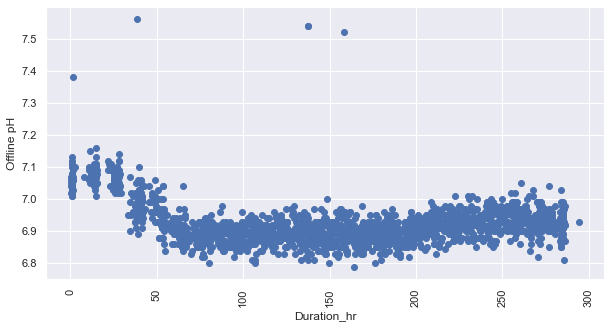

In [45]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration_hr'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('Duration_hr')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

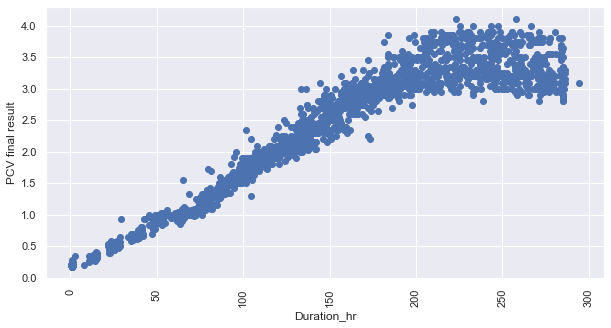

In [46]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration_hr'],df1['PCV final result'])
ax.set_ylabel('PCV final result')
ax.set_xlabel('Duration_hr')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

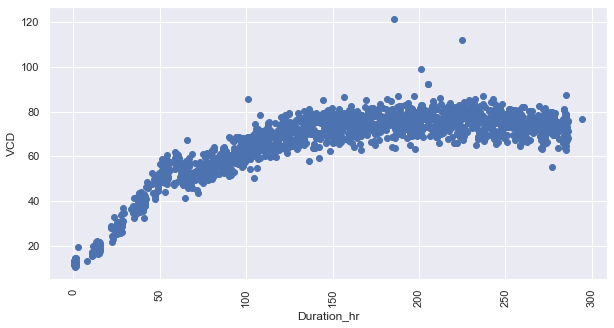

In [47]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration_hr'],df1['VCD'])
ax.set_ylabel('VCD')
ax.set_xlabel('Duration_hr')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

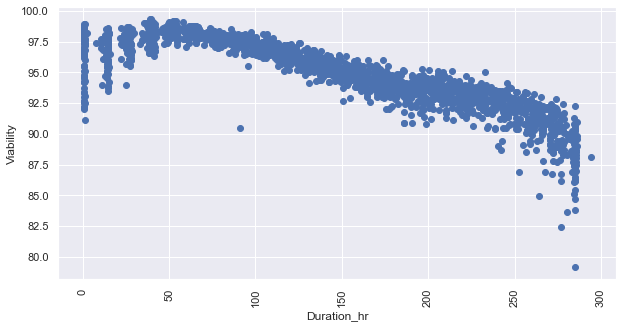

In [48]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration_hr'],df1['Viability'])
ax.set_ylabel('Viability')
ax.set_xlabel('Duration_hr')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

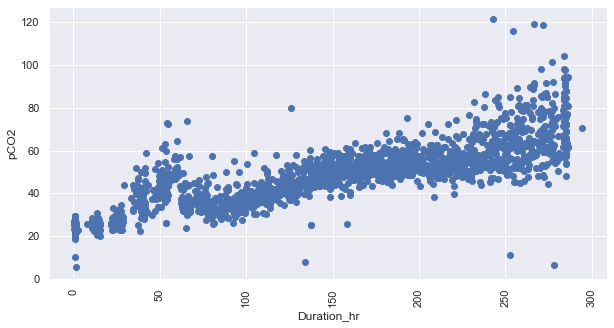

In [49]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration_hr'],df1['pCO2'])
ax.set_ylabel('pCO2')
ax.set_xlabel('Duration_hr')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

In [50]:
#sns.lineplot(x="Duration", y= "PCV final result", data=df,hue='Material_Batch',legend =False)
#plt.xticks(rotation=90)
#plt.gcf().set_size_inches(10,5)
#plt.show()

In [51]:
#sns.lineplot(x="VCD", y= "PCV final result", data=df,hue='Material_Batch',legend =False)
#plt.xticks(rotation=90)
#plt.gcf().set_size_inches(10,5)
#plt.show()

In [52]:
#sns.lineplot(x="VCD", y= "Viability", data=df,hue='Material_Batch',legend =False)
#plt.xticks(rotation=90)
#plt.gcf().set_size_inches(10,5)
#plt.show()

In [53]:
df2.shape

(1948, 14)

In [54]:
df2.columns

Index(['Viability', 'VCD', 'PCV final result', 'Offline pH', 'pO2', 'pCO2',
       'GLN', 'GLUC', 'LAC', 'Ammonia', 'Sodium', 'Osmolality', 'Titer',
       'Duration_hr'],
      dtype='object')

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'variables':df2.columns[:-1], 'VIF':[variance_inflation_factor(df2.values, i+1) for i in range(len(df2.columns[:-1]))]})

variables          VIF
0          Viability   177.187189
1                VCD   105.244542
2   PCV final result  6801.282164
3         Offline pH    11.912043
4                pO2    44.266969
5               pCO2    34.663969
6                GLN    57.650776
7               GLUC    21.609113
8                LAC    49.068781
9            Ammonia   608.684313
10            Sodium  1098.961627
11        Osmolality     1.599898
12             Titer   113.798015

In [58]:
#X1= df1[['Duration','Titer','Viability','PCV final result','Offline pH','pO2','pCO2','GLN','GLUC','LAC','Ammonia','Sodium','Osmolality']]
#X1= df[['Ammonia','Sodium','LAC','pCO2','Offline pH','PCV final result','Viability','Duration_hr']]
X1= df2[['Ammonia','Sodium','LAC','pCO2','Offline pH','Duration_hr']]
y1= df2['VCD']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state= 124)

In [59]:
#X1_train,y1_train=80
#X1_test,y1_test=20


In [60]:
X1.shape

(1948, 6)

In [61]:
y1.shape

(1948,)

In [62]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#pd.DataFrame({'variables':df2.columns[:-1], 'VIF':[variance_inflation_factor(df2.values, i+1) for i in range(len(df2.columns[:-1]))]})

In [63]:
#pivot1 = pd.pivot_table(data= df1, index='Material_Batch', values=['Duration','VCD','Viability','PCV final result','Offline pH','pO2','pCO2','GLN','GLUC','LAC','Ammonia','Sodium','Osmolality'], aggfunc=['mean'])
#pivot1.columns = pivot1.columns.droplevel(0)
#pivot1 = pivot1.reset_index()
#pivot1.round()

In [64]:
#sns.set(color_codes=True)
#pivot1.corr()
#plt.subplots(figsize=(15,5))
#sns.heatmap(pivot1.corr(), cmap= 'YlGnBu', annot=True)

In [65]:
#import plotly.express as px
#fig = px.scatter(pivot1, x="Material_Batch", y="VCD", color='Material_Batch')
#fig.show()

In [66]:
y1

0       11.86
1       20.45
2       28.69
3       39.28
4       52.39
        ...  
1943    78.78
1944    74.78
1945    75.51
1946    67.07
1947    76.75
Name: VCD, Length: 1948, dtype: float64

In [67]:
lr = LinearRegression().fit(X1_train,y1_train)
print(lr.intercept_)
print(lr.coef_)

24.026353676789725
[ 2.33196244  0.05217535  9.45264693  0.12048524 -3.2227905   0.17611923]


In [68]:
y1_pred = lr.predict(X1_test)

In [69]:
y1_pred

array([73.45278123, 71.06400148, 45.69843664, 75.729917  , 70.74390419,
       74.68349736, 69.17486381, 74.24299917, 81.63587187, 71.94280307,
       78.883501  , 73.12105104, 73.92308686, 77.12829842, 41.21736705,
       70.21264319, 76.68825555, 77.66607289, 73.78054073, 72.30161497,
       74.98572939, 80.80292731, 56.3380327 , 77.74053039, 50.05686484,
       58.10555793, 54.64202912, 60.51889738, 18.57128174, 75.27878066,
       74.53327513, 71.35749873, 75.97558039, 36.42220087, 72.46448678,
       60.13904237, 78.22491781, 79.11343184, 74.88829453, 76.99582185,
       75.42633825, 77.19021332, 70.07925139, 72.54214985, 18.79413966,
       76.26367873, 71.16512222, 76.94766188, 76.86800358, 31.18013273,
       71.84018392, 72.67813727, 76.22478387, 72.90387695, 40.46917184,
       78.02535889, 49.69671891, 83.38799045, 63.78884188, 53.69884622,
       74.17315841, 81.63587187, 62.8377048 , 69.382659  , 80.39843933,
       74.22278548, 70.62355405, 77.82137324, 70.62860137, 81.46

In [70]:
df_compare= pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df_compare.head()

Actual  Predicted
887    80.45  73.452781
404    78.88  71.064001
1023   49.95  45.698437
114    77.40  75.729917
1843   77.98  70.743904

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R Square:', metrics.r2_score(y1_test, y1_pred))

Mean Absolute Error: 4.741605905335713
Mean Squared Error: 36.023878191604226
Root Mean Squared Error: 6.0019895194513815
R Square: 0.8878704800177053


In [72]:
#calculate r-squared
r2 = metrics.r2_score(y1_test,y1_pred)
N=y1_test.shape[0]
p=3
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.886999007064475


In [73]:
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X1_train)
X2_test = sc.transform (X1_test)
y2_train = y1_train

In [75]:
lr = LinearRegression().fit(X2_train,y2_train)
print(lr.intercept_)
print(lr.coef_)

62.27884467265725
[ 6.33184929  0.42086674  4.23237943  1.84301539 -0.23507535 14.96963887]


In [76]:
y2_pred = lr.predict(X2_test)
y2_pred

array([73.45278123, 71.06400148, 45.69843664, 75.729917  , 70.74390419,
       74.68349736, 69.17486381, 74.24299917, 81.63587187, 71.94280307,
       78.883501  , 73.12105104, 73.92308686, 77.12829842, 41.21736705,
       70.21264319, 76.68825555, 77.66607289, 73.78054073, 72.30161497,
       74.98572939, 80.80292731, 56.3380327 , 77.74053039, 50.05686484,
       58.10555793, 54.64202912, 60.51889738, 18.57128174, 75.27878066,
       74.53327513, 71.35749873, 75.97558039, 36.42220087, 72.46448678,
       60.13904237, 78.22491781, 79.11343184, 74.88829453, 76.99582185,
       75.42633825, 77.19021332, 70.07925139, 72.54214985, 18.79413966,
       76.26367873, 71.16512222, 76.94766188, 76.86800358, 31.18013273,
       71.84018392, 72.67813727, 76.22478387, 72.90387695, 40.46917184,
       78.02535889, 49.69671891, 83.38799045, 63.78884188, 53.69884622,
       74.17315841, 81.63587187, 62.8377048 , 69.382659  , 80.39843933,
       74.22278548, 70.62355405, 77.82137324, 70.62860137, 81.46

In [77]:
df_compare= pd.DataFrame({'Actual': y1_test, 'Predicted': y2_pred})
df_compare.head()

Actual  Predicted
887    80.45  73.452781
404    78.88  71.064001
1023   49.95  45.698437
114    77.40  75.729917
1843   77.98  70.743904

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y2_pred)))
print('R Square:', metrics.r2_score(y1_test, y2_pred))

Mean Absolute Error: 4.741605905335713
Mean Squared Error: 36.02387819160402
Root Mean Squared Error: 6.001989519451365
R Square: 0.887870480017706


In [79]:
l2=X1.tail(5)
l2.head(5)

Ammonia  Sodium   LAC  pCO2  Offline pH  Duration_hr
1943     4.68    78.5  0.13  63.7        6.95   248.583333
1944     4.74    79.8  0.14  63.4        6.95   261.216667
1945     4.78    79.5  0.08  65.6        6.94   274.283333
1946     4.82    80.5  0.07  64.8        6.98   284.866667
1947     5.01    79.9  0.06  70.6        6.93   294.283333

In [80]:
y5_pred=lr.predict(l2)
y5_pred

array([3962.46918369, 4152.00207832, 4351.53541538, 4509.11209502,
       4661.68564496])

In [96]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [97]:
#DecisionTree Regression

In [98]:
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X1_train, y1_train)
#feature_importances = regressor.feature_importances_


#feature_names = pg_df_attr.columns[1:9]
#print(feature_names)

#k = 8

#print(feature_importances)
#top_k_idx = (feature_importances.argsort()[-k:][::-1])

#print(feature_names[top_k_idx], feature_importances)


DecisionTreeRegressor(random_state=0)

In [ ]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('d:\pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [114]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\df2_tree.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=Credit_Tree_File, feature_names = list(X1_train), class_names = list(train_char_label))
Credit_Tree_File.close()
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(X1_train.feature_importances_, columns = ["Imp"], index = X1_train.columns))

AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

In [109]:
regressor.fit(X1_train , y1_train)
y7_pred = regressor.predict(X1_test)
# print the predicted price
#print("VCD: % d\n"% y_pred) 

In [110]:
regressor.score(X1_test , y1_test)

0.9015676370045622

In [111]:
y7_pred

array([76.49, 79.62, 43.1 , 75.82, 74.09, 73.33, 76.63, 77.05, 69.37,
       68.46, 76.81, 72.12, 76.8 , 69.42, 51.75, 76.56, 80.62, 80.85,
       73.07, 72.12, 72.04, 72.63, 54.47, 68.73, 59.16, 54.38, 66.88,
       60.88, 13.11, 76.83, 74.78, 81.09, 71.32, 32.37, 70.23, 62.78,
       76.86, 80.65, 79.28, 70.42, 71.73, 77.85, 75.45, 80.48, 11.33,
       79.33, 67.89, 72.95, 77.44, 28.88, 73.21, 75.7 , 70.81, 78.16,
       38.04, 80.32, 47.48, 76.87, 60.56, 51.52, 76.34, 69.37, 58.69,
       73.45, 77.79, 75.68, 59.72, 70.5 , 87.01, 76.56, 52.15, 76.34,
       67.53, 76.34, 53.76, 73.4 , 76.74, 70.76, 26.36, 57.76, 36.42,
       73.15, 16.95, 72.07, 48.74, 41.05, 70.4 , 66.62, 75.65, 73.42,
       80.65, 79.02, 27.06, 80.87, 55.28, 79.42, 60.39, 61.76, 51.92,
       79.63, 71.7 , 16.95, 73.22, 72.64, 75.36, 78.4 , 72.29, 59.06,
       61.8 , 83.61, 27.72, 60.09, 19.79, 79.69, 76.49, 75.83, 71.32,
       64.42, 76.87, 67.53, 69.43, 48.74, 53.31, 75.78, 73.48, 70.64,
       68.24, 77.51,

In [115]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['VCD']) 

ValueError: Length of feature_names, 1 does not match number of features, 6

In [113]:
import pickle